In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
sim <- read_csv("analysis/features_normalized/mrxcat_simulation/features.csv") %>%
  separate(file, into=c("noise", "seed"), sep="_") %>%
  mutate(patient="sim")

Rows: 480 Columns: 838
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (4): file, image_path, segmentation_path, extraction_ID
dbl (829): ID, original_shape_Elongation, original_shape_MajorAxisLength, or...
lgl   (5): original_shape_Flatness, original_shape_LeastAxisLength, wavelet-...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [31]:
ranks_sim <- read_csv("analysis/tables/rank_table_simulation.csv") %>% select(-filter, -feature_class) %>% mutate(patient="sim") %>% rename(mae=mae.y)

Rows: 819 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): filter, feature_class, Feature_name
dbl (2): mae.y, rank

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [4]:
acdc <- dir("analysis/features_normalized/ACDC/", full.names = TRUE) %>% map_df(read_csv) %>%
  separate(file, into=c("patient", "noise", "seed"), sep="_")

Rows: 630 Columns: 838
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (4): file, image_path, segmentation_path, extraction_ID
dbl (828): ID, original_shape_Elongation, original_shape_MajorAxisLength, or...
lgl   (6): original_shape_Flatness, original_shape_LeastAxisLength, wavelet-...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 630 Columns: 838
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (4): file, image_path, segmentation_path, extraction_ID
dbl (828): ID, original_shape_Elongation, original_shape_MajorAxisLength, or...
lgl   (6): original_shape_Flatness, original_shape_LeastAxisLength, wavelet-...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 73

In [5]:
enname <- function(x) {
  names(x) <- x
  x
}

In [6]:
ranks_acdc <- dir("analysis/tables/ACDC", full.names = TRUE) %>%
  enname() %>%
  map_df(read_csv, .id="patient") %>%
  mutate(patient = str_remove(patient, ".*ranks_"), patient=str_remove(patient, ".csv"))

Rows: 819 Columns: 3


── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Feature_name
dbl (2): mae, rank

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 819 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Feature_name
dbl (2): mae, rank

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 819 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Feature_name
dbl (2): mae, rank

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 819 Columns: 3
── Column specification ─────────────────────────────────────

In [7]:
bae <- dir("analysis/features_normalized/subject/", full.names = TRUE) %>% map_df(read_csv) %>%
  separate(file, into=c("patient", "noise", "seed"), sep="_")


Rows: 1050 Columns: 838
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (4): file, image_path, segmentation_path, extraction_ID
dbl (828): ID, original_shape_Elongation, original_shape_MajorAxisLength, or...
lgl   (6): original_shape_Flatness, original_shape_LeastAxisLength, wavelet-...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1050 Columns: 838
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (4): file, image_path, segmentation_path, extraction_ID
dbl (829): ID, original_shape_Elongation, original_shape_MajorAxisLength, or...
lgl   (5): original_shape_Flatness, original_shape_LeastAxisLength, wavelet-...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 

In [8]:
ranks_bae <- dir("analysis/tables/subject", full.names = TRUE) %>%
  enname() %>%
  map_df(read_csv, .id="patient") %>%
  mutate(patient = str_remove(patient, ".*ranks_"), patient=str_remove(patient, ".csv"))

Rows: 819 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): filter, feature_class, feature, Feature_name
dbl (2): mae, rank

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 819 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): filter, feature_class, feature, Feature_name
dbl (2): mae, rank

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 819 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): filter, feature_class, feature, Feature_name
dbl (2): mae, rank

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_typ

In [9]:
feature_name <- "wavelet-LLL_gldm_LowGrayLevelEmphasis"

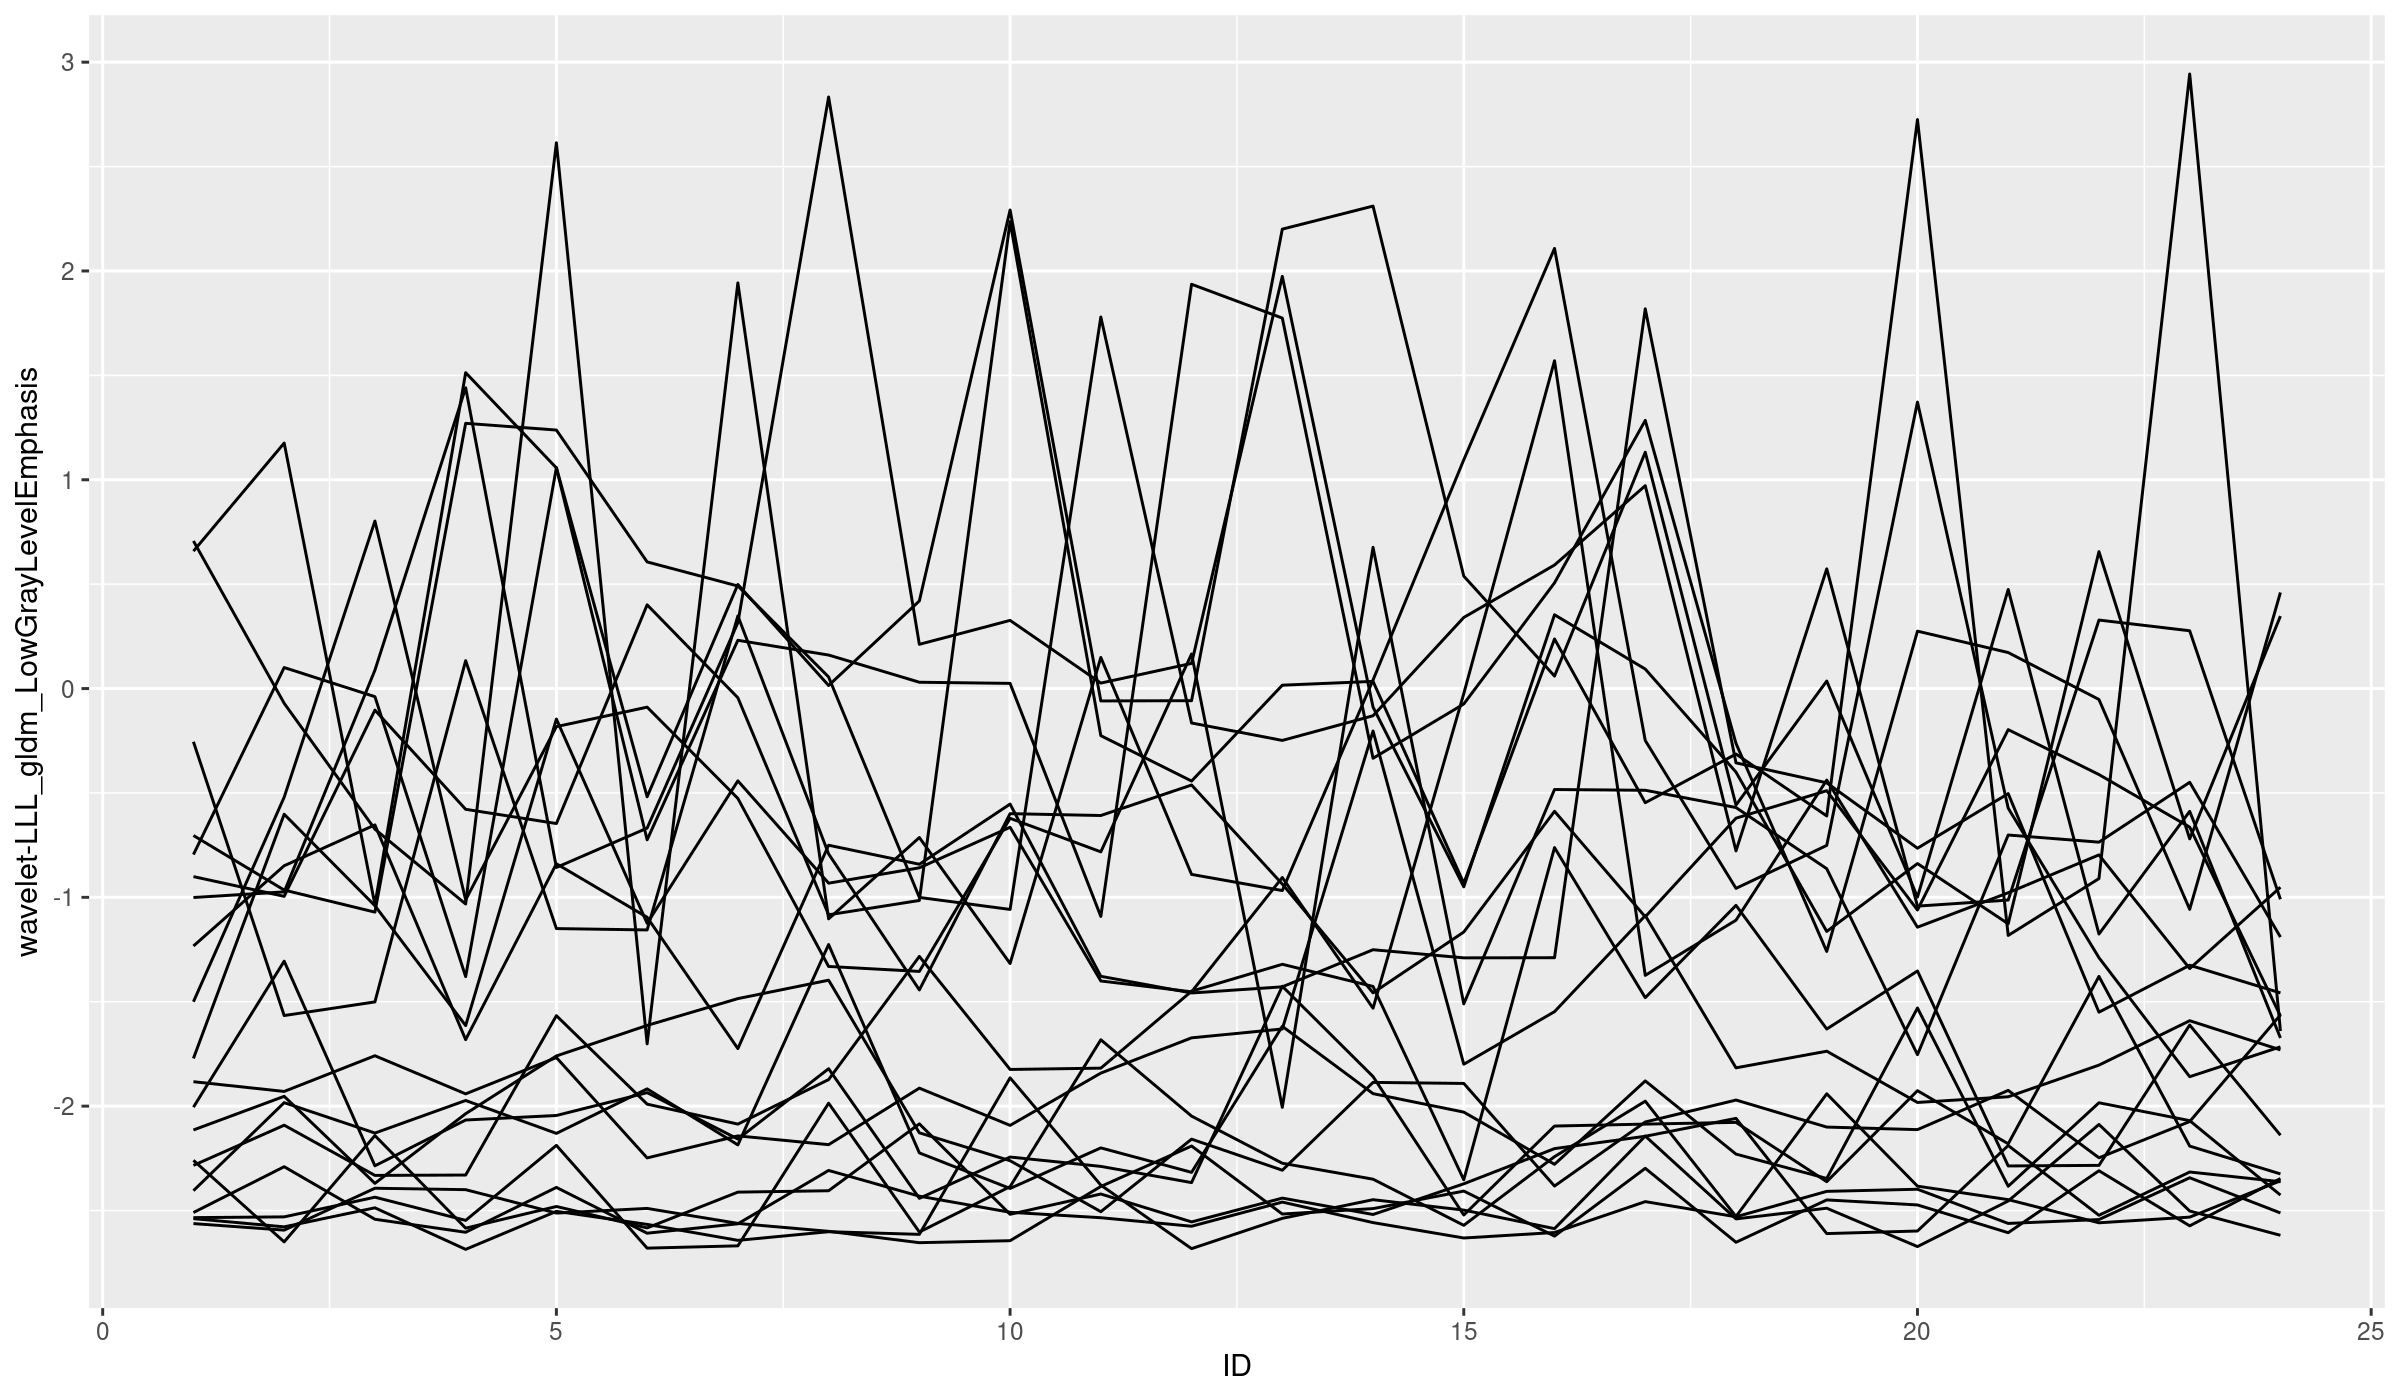

In [14]:
sim %>%
  ggplot(aes(x=ID, y=.data[[feature_name]], group=interaction(noise,seed))) + geom_line()

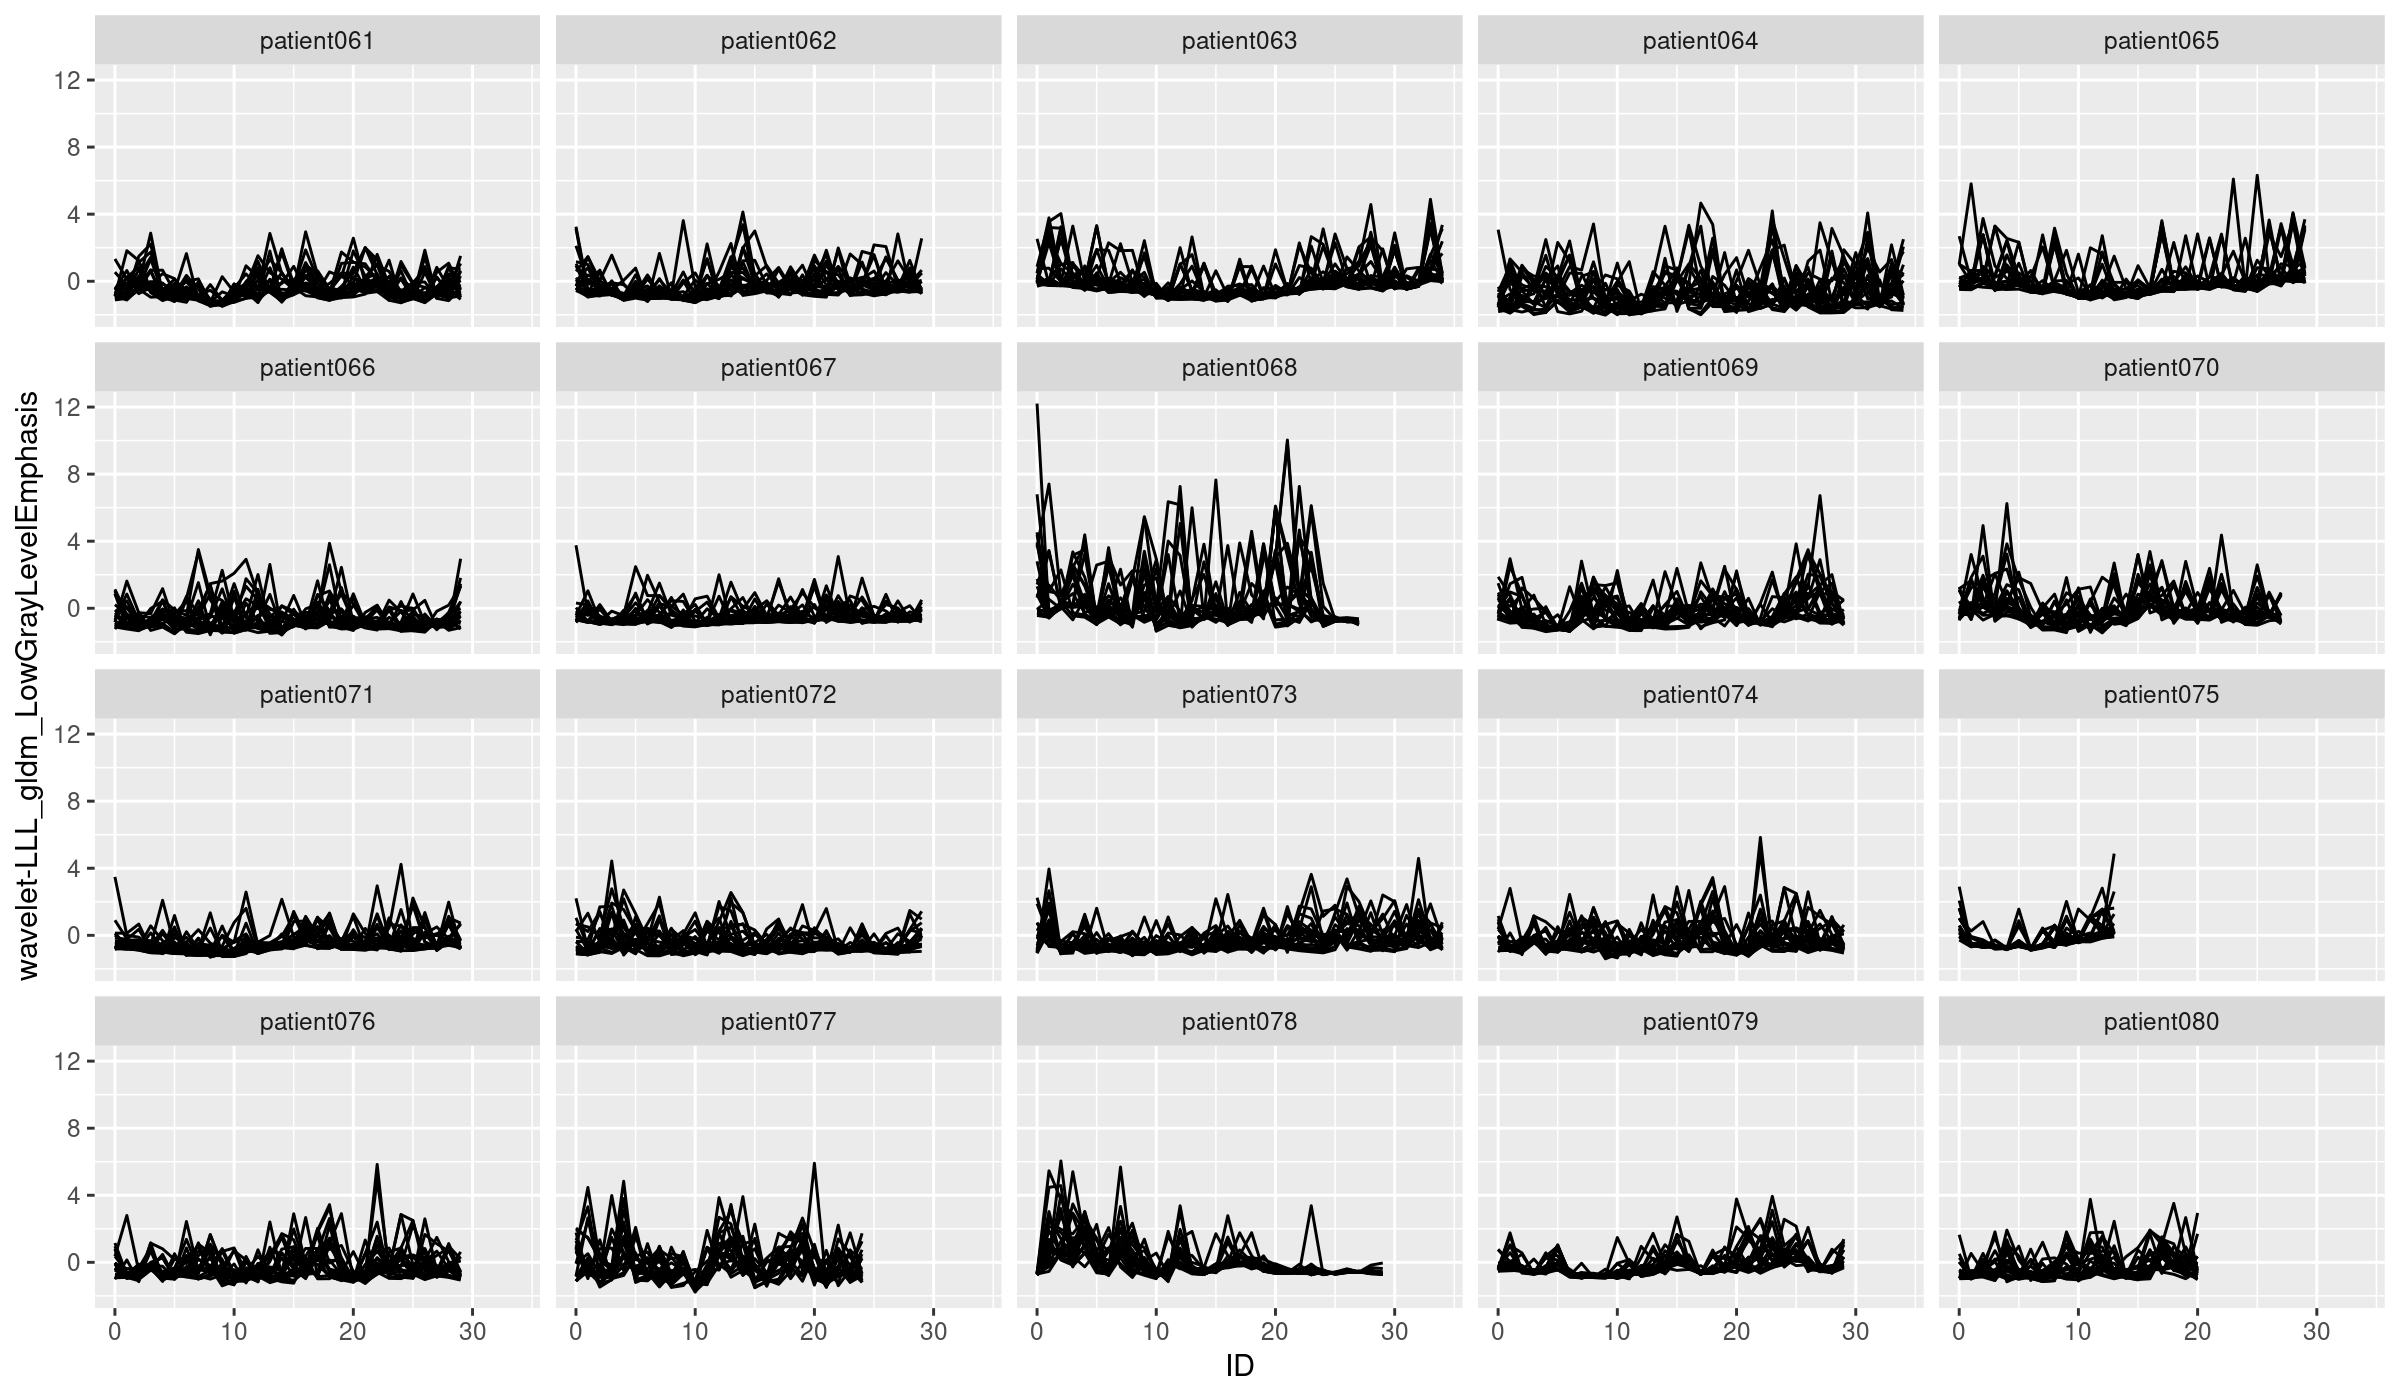

In [15]:
acdc %>%
  ggplot(aes(x=ID, y=.data[[feature_name]], group=interaction(noise, seed))) + geom_line() + facet_wrap(~patient)

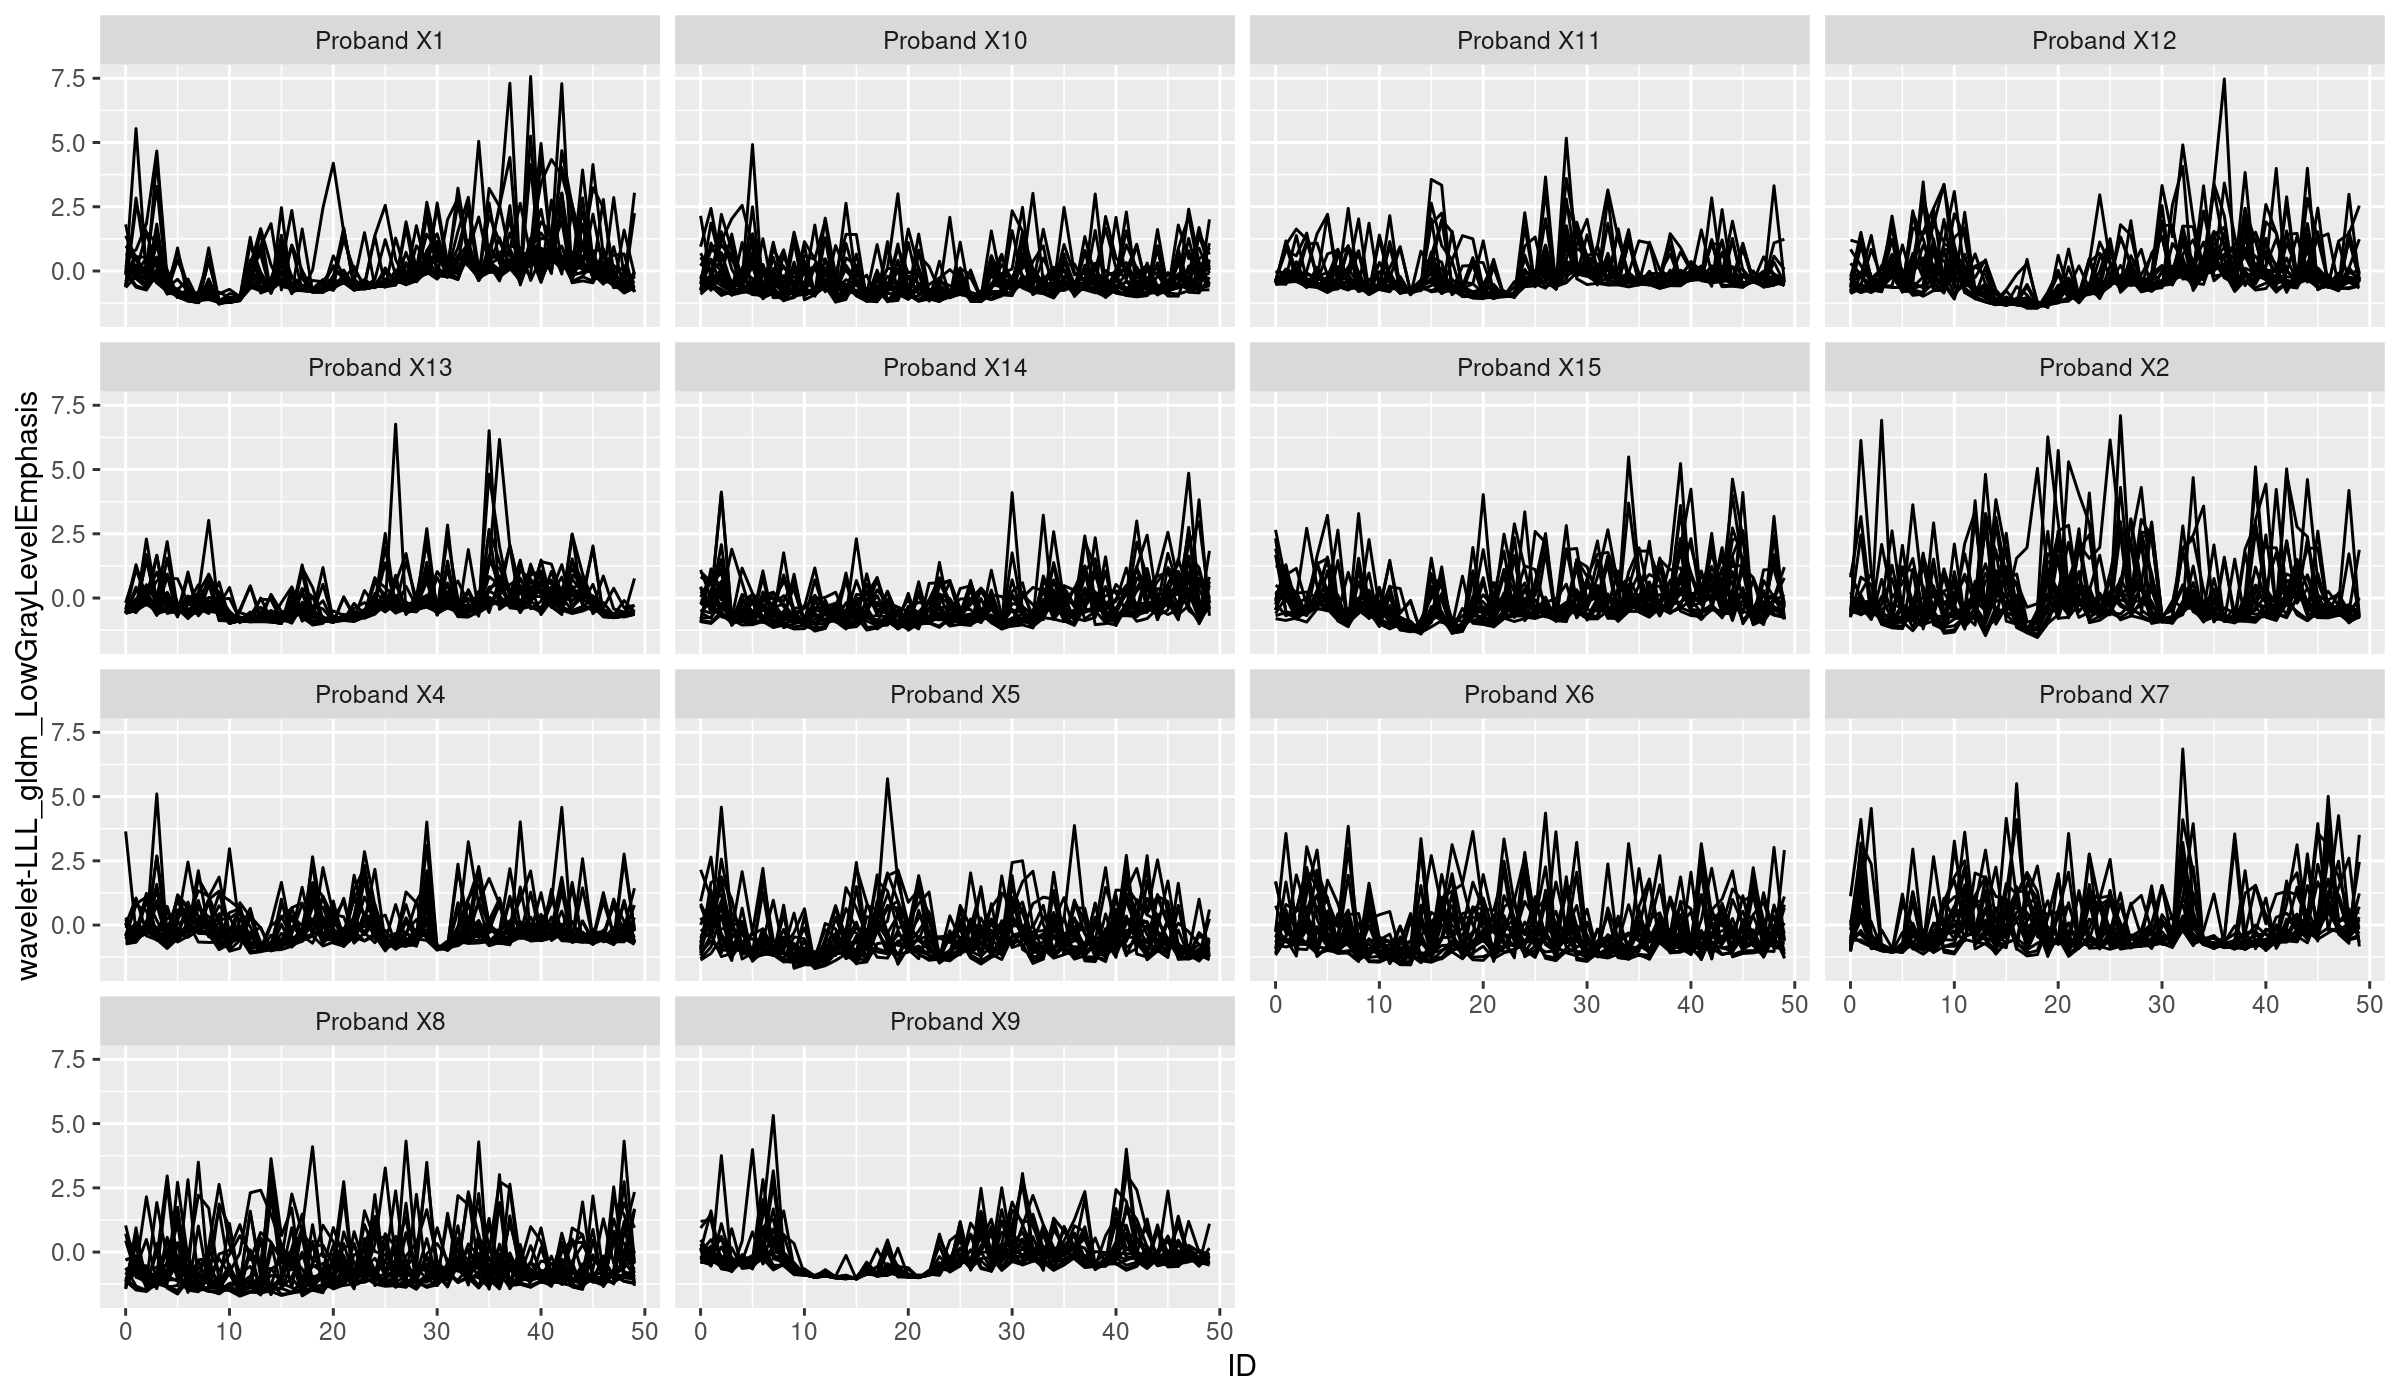

In [16]:
bae %>%
  ggplot(aes(x=ID, y=.data[[feature_name]], group=interaction(noise, seed))) + geom_line() + facet_wrap(~patient)

In [17]:
combined <- bind_rows(sim, acdc, bae)

In [32]:
colnames(ranks_sim)

[1] "Feature_name" "mae"          "rank"         "patient"

In [34]:
ranks_combined <- bind_rows(ranks_sim, select(ranks_acdc, colnames(ranks_sim)), select(ranks_bae, colnames(ranks_sim)))

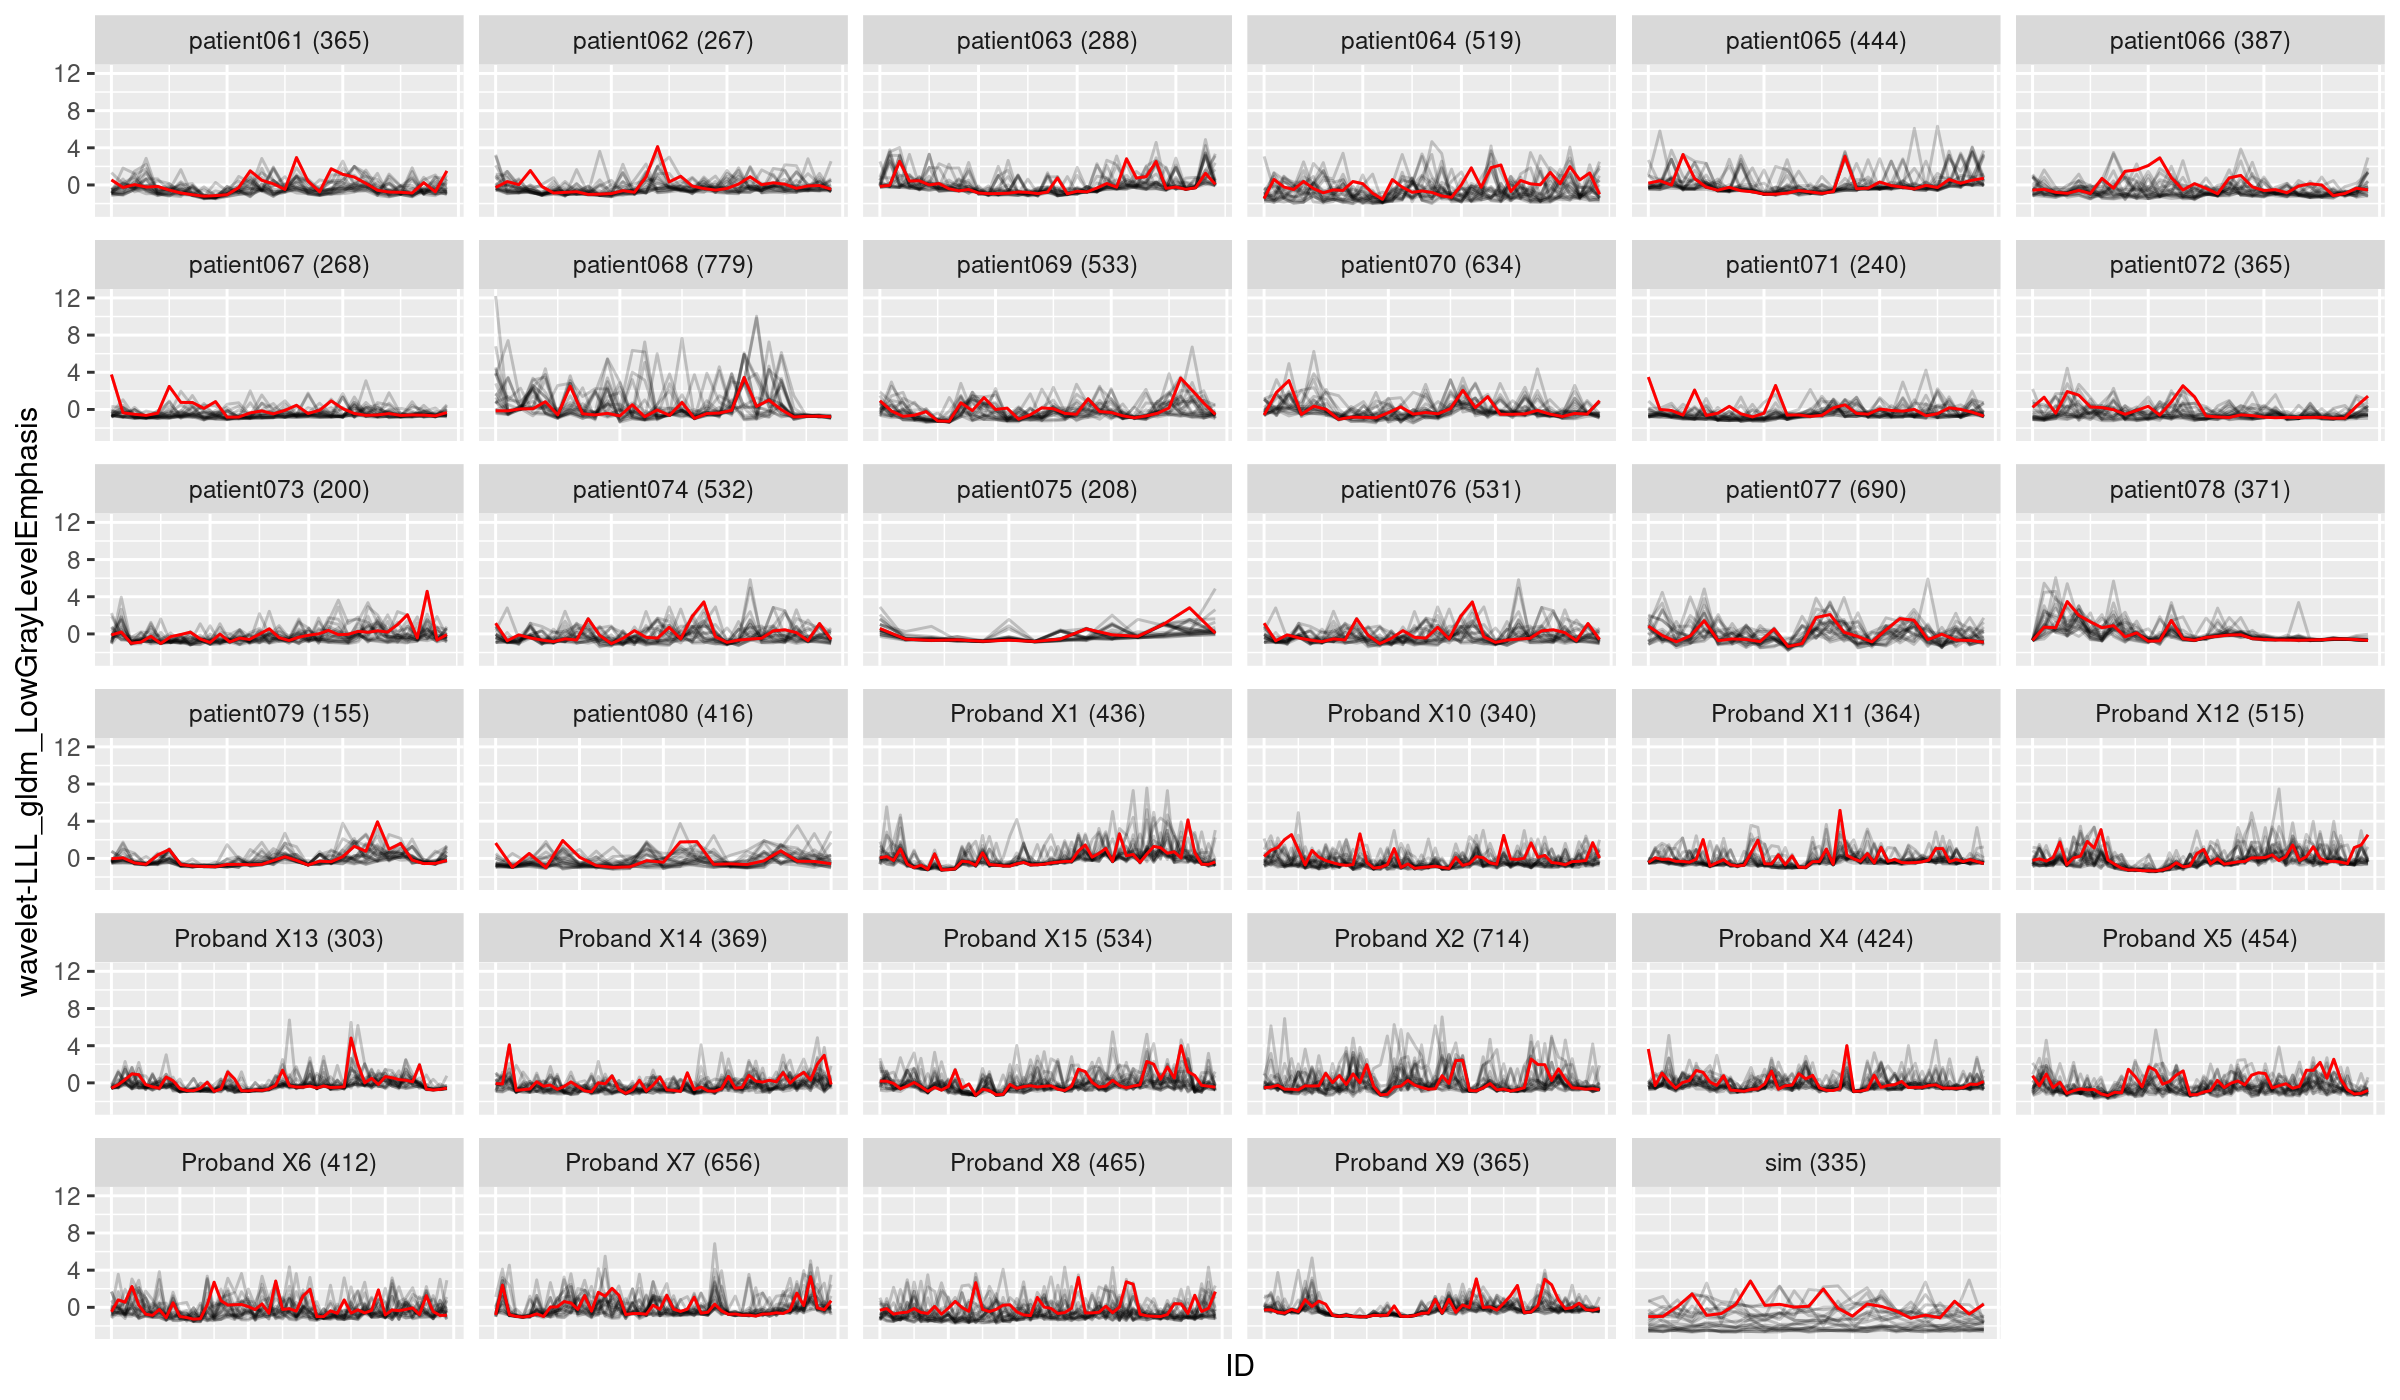

In [19]:
combined %>%
  left_join(filter(ranks_combined, Feature_name==.env$feature_name), by="patient") %>%
  mutate(patient = glue::glue("{patient} ({rank})")) %>%
  ggplot(aes(x=ID, y=.data[[feature_name]], group=interaction(noise, seed))) +
    geom_line(alpha=.2) +
    geom_line(data = ~filter(., parse_number(noise)==0 | (noise=="snr30" & parse_number(seed)==1)), color="red") +
    facet_wrap(~patient, scales="free_x") + theme(axis.text.x = element_blank(), axis.ticks.x = element_blank())

In [20]:
make_comparison_plot <- function(feature_name){
  combined %>%
    left_join(filter(ranks_combined, Feature_name==.env$feature_name), by="patient") %>%
    mutate(patient = glue::glue("{patient} ({rank})")) %>%
    ggplot(aes(x=ID, y=.data[[feature_name]], group=interaction(noise, seed))) +
      geom_line(alpha=.2) +
      geom_line(data = ~filter(., parse_number(noise)==0 | (noise=="snr30" & parse_number(seed)==1)), color="red") +
      facet_wrap(~patient, scales="free_x") + theme(axis.text.x = element_blank(), axis.ticks.x = element_blank())
}

In [21]:
ranks <- ranks_sim %>% drop_na

In [27]:
pdf("analysis/plots/comparison_plots.pdf", onefile = TRUE)
for (i in levels(fct_reorder(ranks$Feature_name, ranks$rank))) {
  print(make_comparison_plot(i))
}
dev.off()

png 
  2

In [37]:
ranks_combined %>% filter(!is.na(rank)) %>% arrange(-mae) %>% head(10)

Feature_name                       mae         rank patient    
1  wavelet-LLH_ngtdm_Coarseness       42991.62846 786  patient062 
2  wavelet-LLH_ngtdm_Coarseness       34452.02317 787  patient065 
3  wavelet-LLH_ngtdm_Coarseness       20369.08501 789  patient063 
4  wavelet-LLH_ngtdm_Coarseness        9815.65390 787  Proband X11
5  wavelet-LLH_ngtdm_Coarseness        4321.06241 786  Proband X5 
6  original_firstorder_10Percentile      27.71532 790  sim        
7  original_glcm_Autocorrelation         23.66879 789  sim        
8  wavelet-HHL_glcm_ClusterProminence    22.17008 785  patient073 
9  original_firstorder_Minimum           20.81869 788  sim        
10 original_firstorder_Median            18.30029 787  sim

In [38]:
library(corrr)

Non-numeric variables removed from input: `Feature_name`


Correlation computed with
• Method: 'spearman'
• Missing treated using: 'pairwise.complete.obs'


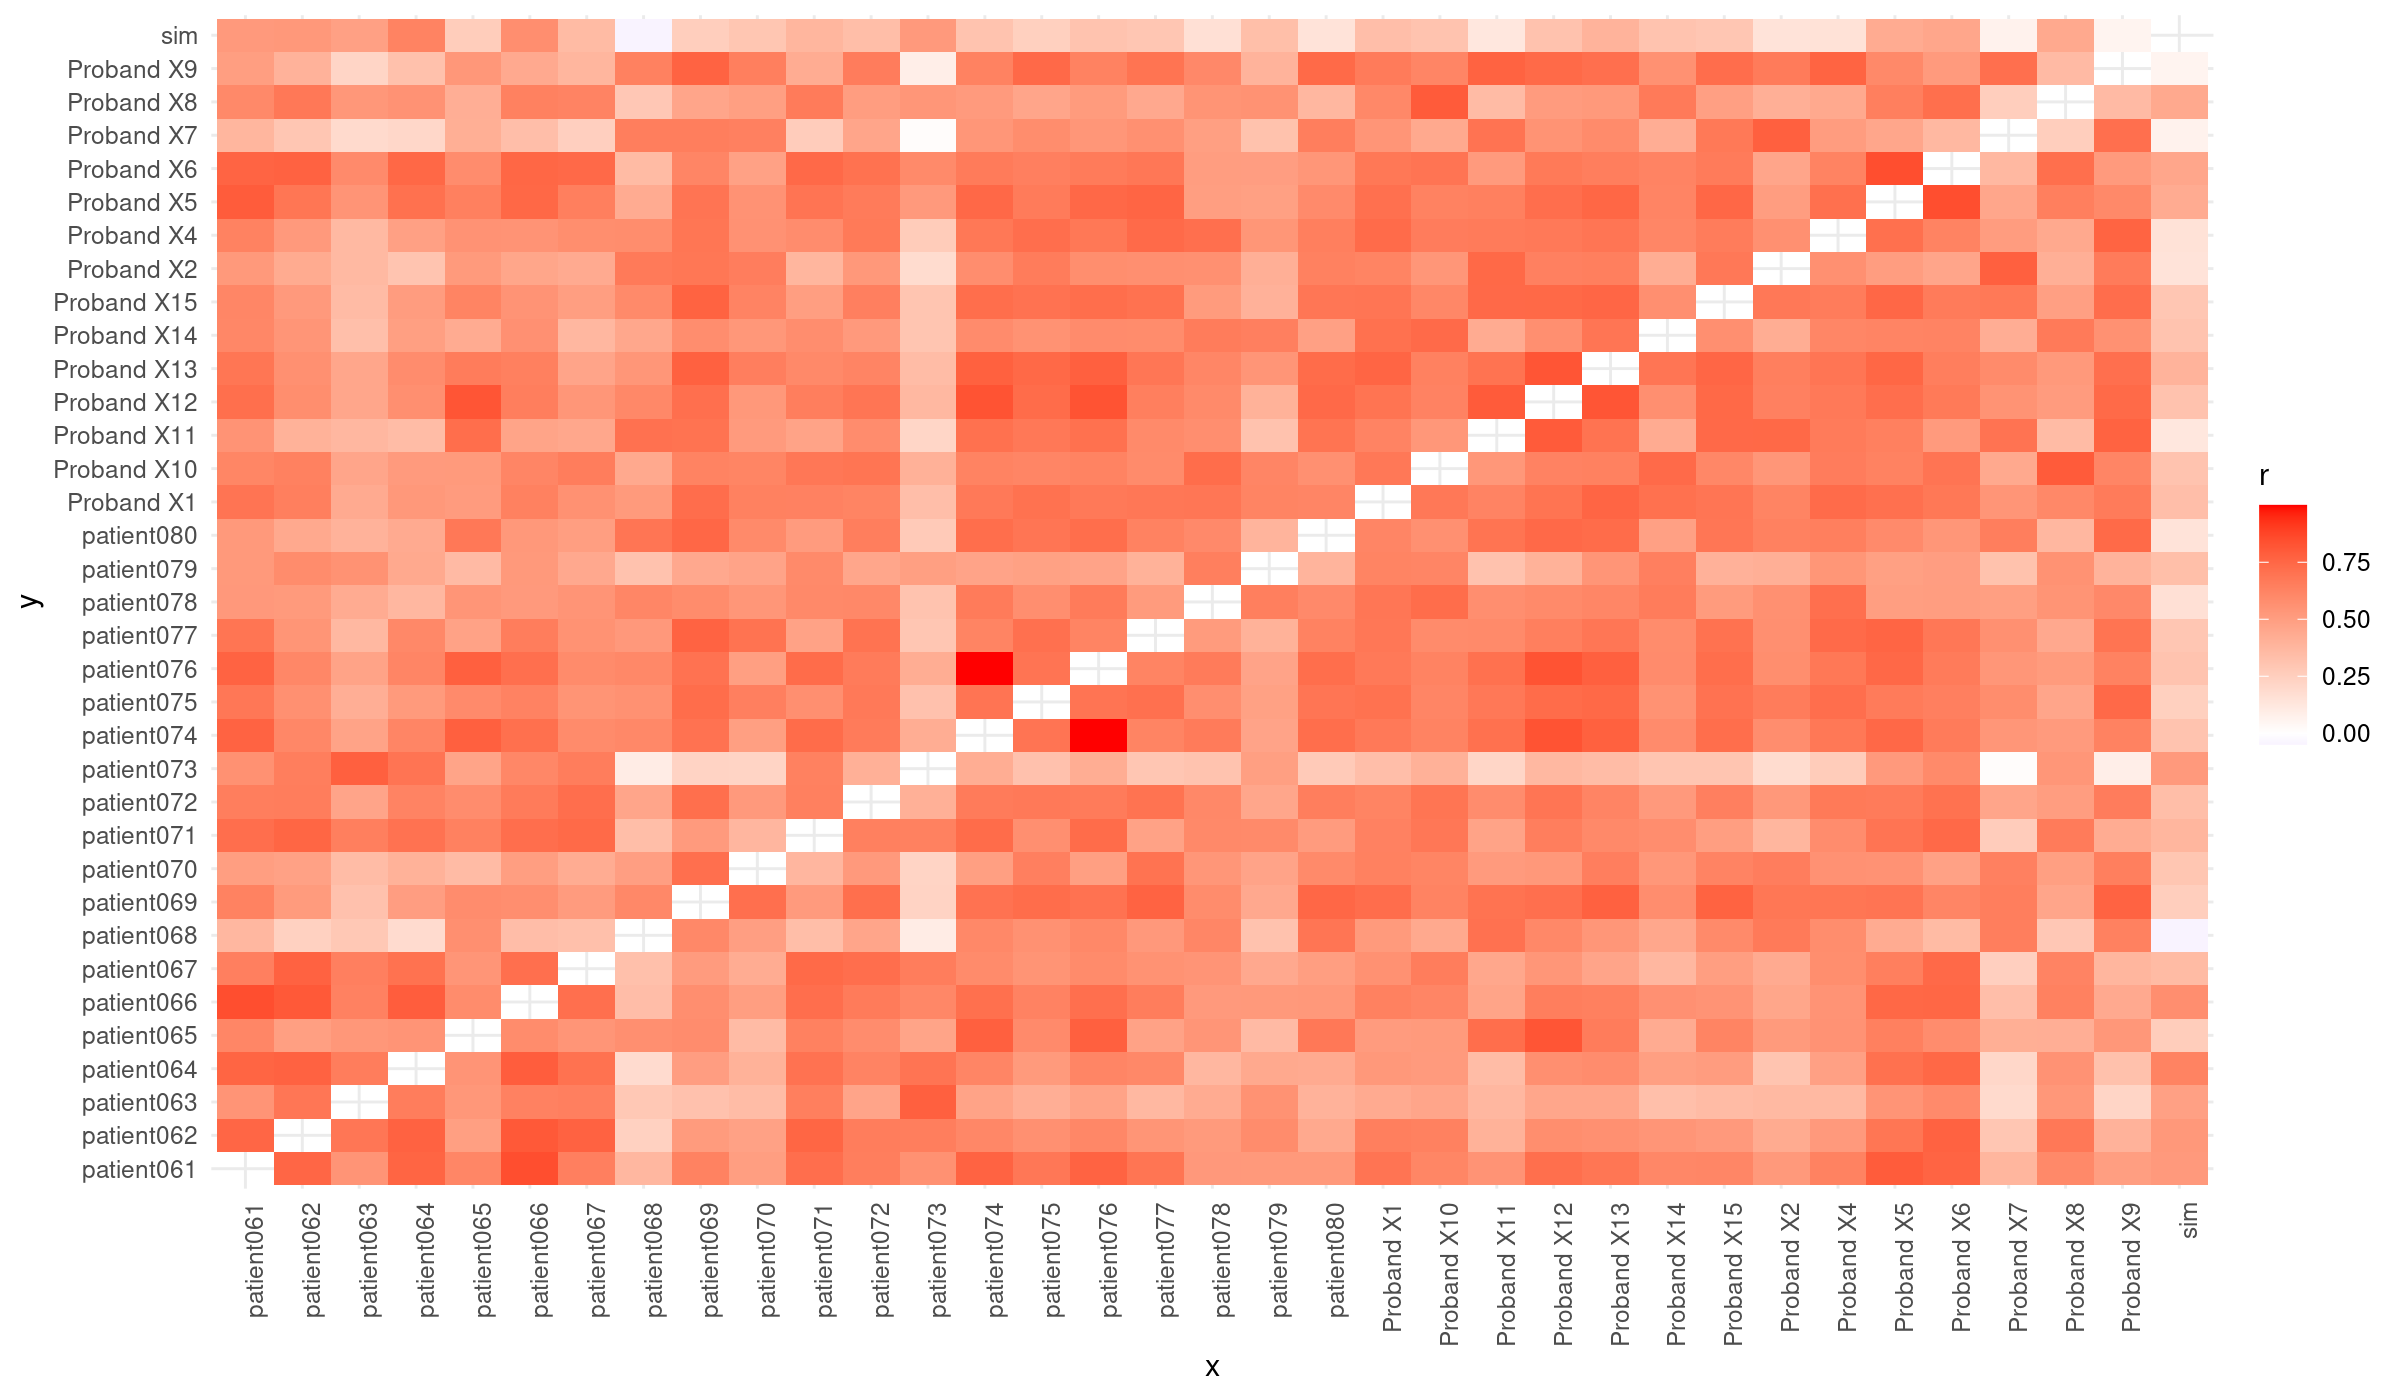

In [62]:
ranks_combined %>%
  filter(!is.na(rank)) %>%
  select(-rank) %>%
  #mutate(mae = pmin(mae, 30)) %>%
  pivot_wider(names_from=patient, values_from=mae) %>%
  correlate(method = "spearman") %>%
  #shave() %>%
  stretch(na.rm = TRUE) %>%
  ggplot(aes(x,y,fill=r)) + geom_tile() + theme_minimal() + scale_fill_gradient2(low="blue", high="red") + theme(axis.text.x = element_text(angle = 90, hjust = 1))

In [70]:
ranks_combined %>%
  filter(!is.na(rank)) %>%
  select(-rank) %>%
  #mutate(mae = pmin(mae, 30)) %>%
  pivot_wider(names_from=patient, values_from=mae) %>%
  correlate(method = "spearman") %>%
  shave() %>%
  stretch(na.rm = TRUE) %>%
  summarize(median(r), mad(r)) 

Non-numeric variables removed from input: `Feature_name`
Correlation computed with
• Method: 'spearman'
• Missing treated using: 'pairwise.complete.obs'


median(r) mad(r)   
1 0.5887896 0.1376644

In [69]:
ranks_combined %>%
  filter(!is.na(rank)) %>%
  select(-rank) %>%
  #mutate(mae = pmin(mae, 30)) %>%
  pivot_wider(names_from=patient, values_from=mae) %>%
  correlate(method = "spearman") %>%
  #shave() %>%
  stretch(na.rm = TRUE) %>%
  group_by(x) %>%
  summarize(median(r), mad(r)) %>%
  arrange(desc(`median(r)`))

Non-numeric variables removed from input: `Feature_name`
Correlation computed with
• Method: 'spearman'
• Missing treated using: 'pairwise.complete.obs'


x           median(r) mad(r)    
1  patient076  0.6640502 0.09575036
2  patient074  0.6640368 0.09609638
3  Proband X5  0.6563432 0.11626805
4  Proband X13 0.6522472 0.10953636
5  Proband X12 0.6520111 0.11911901
6  Proband X6  0.6501902 0.11908488
7  patient075  0.6458093 0.10159780
8  patient072  0.6443564 0.07258115
9  patient069  0.6433452 0.11179308
10 Proband X1  0.6431221 0.06804056
11 Proband X15 0.6364228 0.13082737
12 Proband X4  0.6327652 0.10086679
13 Proband X9  0.6267085 0.16540550
14 patient061  0.6258037 0.14110114
15 patient066  0.6251862 0.13512399
16 Proband X10 0.6201693 0.06656199
17 patient071  0.6196370 0.15093885
18 patient077  0.6160135 0.11856352
19 patient080  0.6090510 0.12901138
20 Proband X11 0.5914543 0.17497622
21 patient062  0.5747518 0.11872334
22 patient078  0.5721948 0.07546703
23 Proband X14 0.5681408 0.09722109
24 patient067  0.5539206 0.14272156
25 Proband X2  0.5522666 0.15796210
26 patient064  0.5517448 0.15521681
27 patient065  0.5516624 0.09886115
28 patient070  0.5214077 0.12450591
29 Proband X8  0.5170797 0.11710587
30 patient068  0.5096050 0.17462761
31 Proband X7  0.4799162 0.22446014
32 patient079  0.4733502 0.10517649
33 patient063  0.4620436 0.14076338
34 patient073  0.3863125 0.20155158
35 sim         0.3140168 0.15043494

In [119]:
theme_set(theme_minimal())

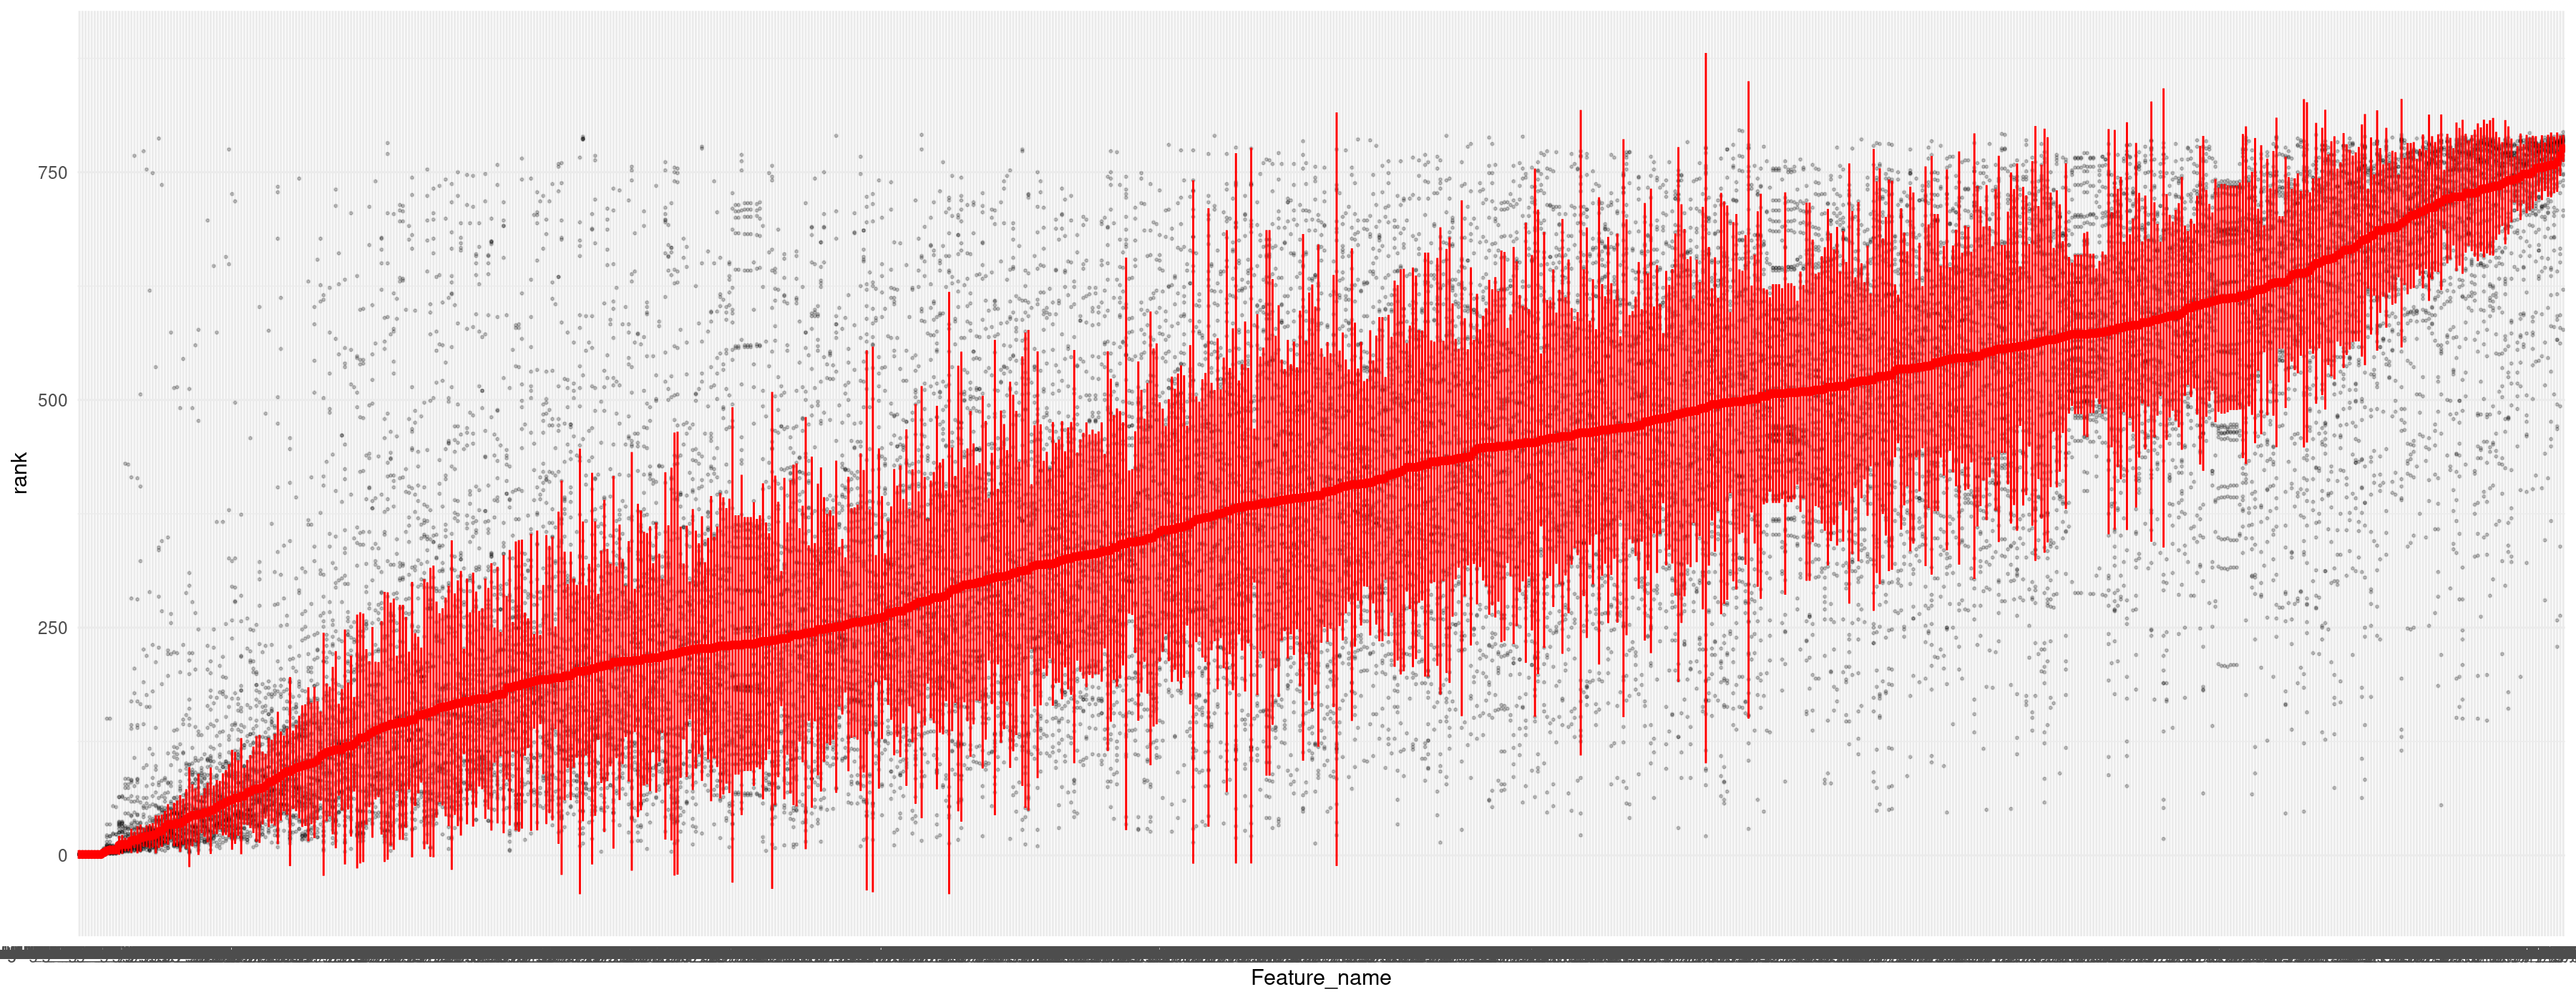

In [127]:
oldopt <- options(repr.plot.width=18)
ranks_combined %>%
  filter(!is.na(rank)) %>%
  mutate(mae = pmin(mae, 30)) %>%
  mutate(Feature_name = fct_reorder(Feature_name, rank, median)) %>%
  ggplot(aes(x=Feature_name, y=rank)) + geom_point(size=.4, alpha=.2) + stat_summary(geom="pointrange", color="red", size=.2, fun.data=ggpubr::median_mad)
options(oldopt)

In [130]:
rank_order_by_median <- ranks_combined %>%
  filter(!is.na(rank)) %>%
  group_by(Feature_name) %>%
  summarize(median_rank=median(rank), mad_rank=mad(rank)) %>%
  mutate(Feature_name = fct_reorder(Feature_name, median_rank)) %>%
  pull(Feature_name) %>%
  levels()

In [131]:
pdf("analysis/plots/comparison_plots_medianRank.pdf", onefile = TRUE)
for (i in rank_order_by_median) {
  print(make_comparison_plot(i))
}
dev.off()

png 
  2